In [1]:
import sympy as sp
import numpy as np
from sympy import symbols
sf = sp.SingularityFunction
import matplotlib.pyplot as plt

In [2]:
EI = symbols('EI')
x = symbols('x')

#### Benadering

In [3]:
x, Cv, Cm, Cphi, Cw, Av, Bv, MA, Ah, Cn= sp.symbols('x, C_v, C_m, C_phi, C_w, A_v, B_v, M_A, A_h, C_n')

l = 4
F1 = 10
F2 = 10

theta = sp.atan(0.25)
alpha = sp.atan(0.5)

In [4]:
## Krachtenvergelijking van staaf 1
qz1 = sp.nsimplify(-Av * sf(x, 0, -1) + MA* sf(x, 0, -2) + F1 *sf(x, l/2, -1))
qx1 = sp.nsimplify(Ah * sf(x, 0, -1))

In [5]:
## Krachtenvergelijking van staaf 2

qz2 = sp.nsimplify(-Bv * sf(x, (3/2)*l, -1) + F2 *sf(x, (5/4)*l, -1))
qx2 = 0

In [6]:
## V = V1 + V2 
## Dwarskracht in de eerste staaf 
V1 = sp.integrate(-qx1 * sp.sin(theta), x) + sp.integrate(-qz1 * sp.cos(theta), x)
## Dwasrkracht in de tweede staaf
V2 = sp.integrate(-qx2 * sp.sin(alpha), x) + sp.integrate(-qz2 * sp.cos(alpha), x)

V = V1 + V2 + Cv

In [7]:
## N = N1 + N2 
## Normaalkracht in de eerste staaf
N1 = sp.integrate(-qx1 * sp.cos(theta), x) + sp.integrate(qz1 * sp.sin(theta), x)
## Normaalkracht in de tweedee staaf
N2 = sp.integrate(-qx2 * sp.cos(alpha), x) + sp.integrate(qz2 * sp.sin(alpha), x)
N = N1 + N2 + Cn

In [8]:
M1 = sp.integrate(V1/sp.cos(theta), x)
M2 = sp.integrate(V2/sp.cos(alpha), x)
M = M1 + M2 + Cm
phi = sp.integrate(M, x) + Cphi
W = sp.integrate(phi, x) + Cw

In [9]:
eq1 = V.subs(x, -1)
eq2 = M.subs(x, -1)
eq3 = V.subs(x, (3/2)*l + 1)

eq4 = phi.subs(x, 0)
eq5 = W.subs(x, 0)

eq6 = M.subs(x, (3/2)*l)
eq7 = W.subs(x, (3/2)*l )

eq8 = N.subs(x, -0.01)
eq9 = N.subs(x, ((3/2)*l) )

equations = [eq1-0, eq2-0, eq3-0, eq4-0, eq5-0, eq6-0, eq7 -0, eq8-0, eq9-0]
solutions = sp.solve(equations, (Cn, Cm, Cphi, Cw, Av, Bv, MA, Cv, Ah))

In [10]:
display(solutions)

{C_n: 0.0,
 C_m: 0.0,
 C_phi: 0.0,
 C_w: 0.0,
 A_v: 11.0539215686274,
 B_v: 8.92036924928217,
 M_A: 15.9722222222222,
 C_v: 0.0,
 A_h: 0.234204793028313}

[0.9656511 0.9656511]


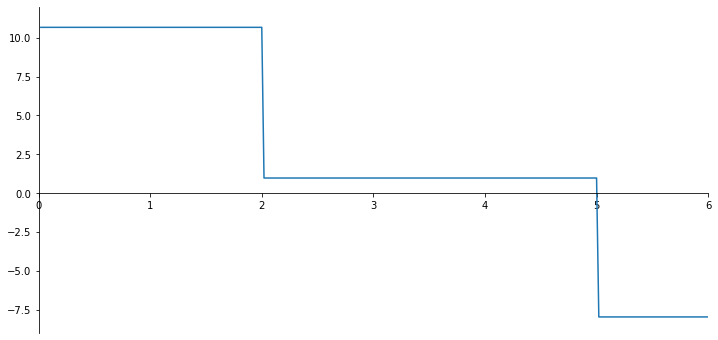

In [11]:
x_val = np.linspace(0, 3*l/2, 301)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify())
V_list = V_numpy(x_val)

print(V_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-9, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(V_list));

[-0.48282555 -0.48282555]


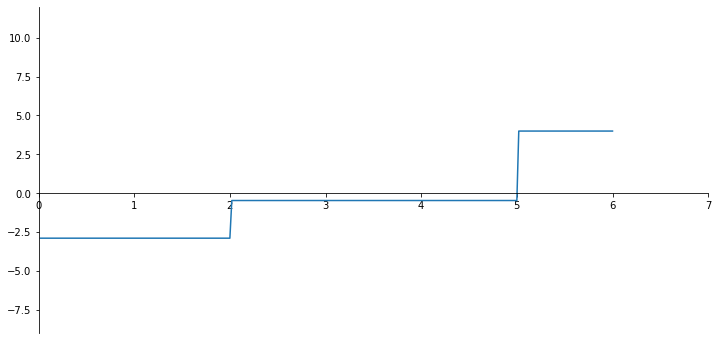

In [12]:
x_val = np.linspace(0, 3*l/2, 301)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) 
N_list = N_numpy(x_val)

print(N_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 7)
ax.set_ylim(-9, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(N_list)); 

#### Iteratie 1

In [13]:
Cv, Cm, Cphi, Cw, Av, Bv, MA, Ah, Cn= sp.symbols('C_v, C_m, C_phi, C_w, A_v, B_v, M_A, A_h, C_n')

# Define qz and qx
DwaL =  0.9656511
DwaR =  0.9656511
NorL = -0.48282555
NorR = -0.48282555
qz1 = sp.nsimplify(-Av * sf(x, 0, -1) + MA* sf(x, 0, -2) + F1 *sf(x, l/2, -1) + DwaL * sf(x, l, -1) * sp.cos(theta)- NorL * sf(x, l, -1) * sp.sin(theta))
qz2 = sp.nsimplify(-Bv * sf(x, (3/2)*l, -1) + F2 *sf(x, (5/4)*l, -1) - DwaR *sf(x, l, -1)* sp.cos(alpha) + NorR * sf(x, l, -1)* sp.sin(alpha) )
qx1 = sp.nsimplify(Ah * sf(x, 0, -1) + DwaL * sf(x, l, -1) * sp.sin(theta)  + NorL * sf(x, l, -1)* sp.cos(theta))
qx2 = sp.nsimplify(-DwaR * sf(x, l, -1)*sp.sin(alpha) -NorR * sf(x, l, -1)* sp.cos(alpha))


# Define V as a function of x
## staaf 1
V1 = sp.cos(theta) * sp.integrate( -qz1 , x)
V2 = sp.integrate(- (sp.sin(theta) * sp.tan(theta) * qx1), x)
## staaf 2
V3 = sp.cos(alpha) * sp.integrate( -qz2 , x)
V4 = sp.integrate(- (sp.sin(alpha) * sp.tan(alpha) * qx2), x)

V =V1 + V2 + V3 + V4 + Cv

# Define M as an integral of V
## staaf 1
M1 = sp.integrate( (V1  / sp.cos(theta)), x)
M2 = sp.integrate( (V2  / sp.cos(theta)), x)
## sfaaf 2
M3 = sp.integrate((V3 / sp.cos(alpha)), x)
M4 = sp.integrate((V4 / sp.cos(alpha)), x)
M  = M1 + M2 + M3+ M4 + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw

N1 = sp.integrate(sp.sin(theta) * (-qx1 + qz1), x) + Cn
N2 = sp.integrate(sp.sin(alpha) * (-qx2 + qz2), x) 
N = N1+ N2 +Cn

In [14]:
eq1 = V.subs(x, -1)
eq2 = M.subs(x, -1)
eq3 = V.subs(x, (3/2)*l + 1)
eq4 = phi.subs(x, 0)
eq5 = W.subs(x, 0)
eq6 = M.subs(x, (3/2)*l)
eq7 = W.subs(x, (3/2)*l)
eq8 = N.subs(x, -0.01)
eq9 = N.subs(x, ((3/2)*l) +1 )
equations = [eq1-0, eq2-0, eq3-0, eq4-0, eq5-0, eq6-0, eq7 -0, eq8-0, eq9-0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, MA, Cn, Ah))
display(solutions)

{C_v: 0.0,
 C_m: 0.0,
 C_phi: 0.0,
 C_w: 0.0,
 A_v: 10.9868559793420,
 B_v: 8.98907082505678,
 M_A: 15.9363582385174,
 C_n: 0.0,
 A_h: 0.174590935654146}

[0.9468048  0.90420254]


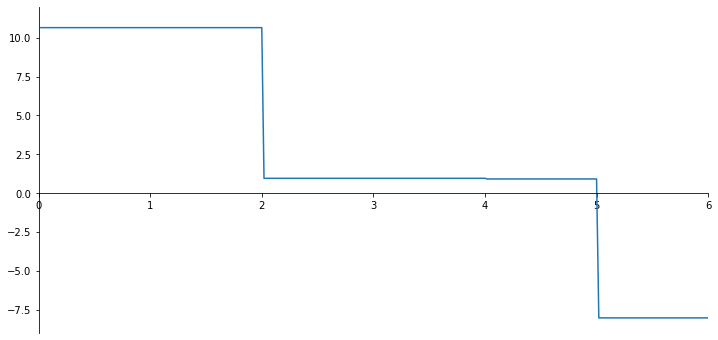

In [15]:
x_val = np.linspace(0, 3*l/2, 301)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) 
V_list = V_numpy(x_val)
print(V_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-9, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(V_list)); 

[-0.28169225 -0.45210127]


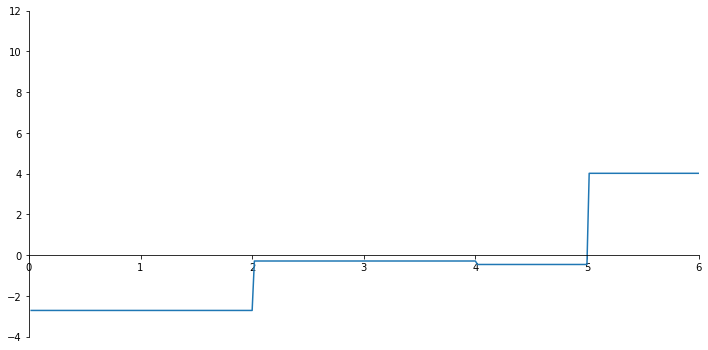

In [16]:
x_val = np.linspace(0, 3*l/2, 301)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) 
N_list = N_numpy(x_val)

print(N_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-4, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(N_list));

#### Iteratie 2

In [17]:
Cv, Cm, Cphi, Cw, Av, Bv, MA, Ah, Cn= sp.symbols('C_v, C_m, C_phi, C_w, A_v, B_v, M_A, A_h, C_n')

# Define qz and qx
DwaL =  0.9468048
DwaR =  0.90420254
NorL = -0.28169225
NorR = -0.45210127
qz1 = sp.nsimplify(-Av * sf(x, 0, -1) + MA* sf(x, 0, -2) + F1 *sf(x, l/2, -1) + DwaL * sf(x, l, -1) * sp.cos(theta)- NorL * sf(x, l, -1) * sp.sin(theta))
qz2 = sp.nsimplify(-Bv * sf(x, (3/2)*l, -1) + F2 *sf(x, (5/4)*l, -1) - DwaR *sf(x, l, -1)* sp.cos(alpha) + NorR * sf(x, l, -1)* sp.sin(alpha) )
qx1 = sp.nsimplify(Ah * sf(x, 0, -1) + DwaL * sf(x, l, -1) * sp.sin(theta)  + NorL * sf(x, l, -1)* sp.cos(theta))
qx2 = sp.nsimplify(-DwaR * sf(x, l, -1)*sp.sin(alpha) -NorR * sf(x, l, -1)* sp.cos(alpha))


# Define V as a function of x
## staaf 1
V1 = sp.cos(theta) * sp.integrate( -qz1 , x)
V2 = sp.integrate(- (sp.sin(theta) * sp.tan(theta) * qx1), x)
## staaf 2
V3 = sp.cos(alpha) * sp.integrate( -qz2 , x)
V4 = sp.integrate(- (sp.sin(alpha) * sp.tan(alpha) * qx2), x)

V =V1 + V2 + V3 + V4 + Cv

# Define M as an integral of V
## staaf 1
M1 = sp.integrate( (V1  / sp.cos(theta)), x)
M2 = sp.integrate( (V2  / sp.cos(theta)), x)
## sfaaf 2
M3 = sp.integrate((V3 / sp.cos(alpha)), x)
M4 = sp.integrate((V4 / sp.cos(alpha)), x)
M  = M1 + M2 + M3+ M4 + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw

N1 = sp.integrate(sp.sin(theta) * (-qx1 + qz1), x) + Cn
N2 = sp.integrate(sp.sin(alpha) * (-qx2 + qz2), x) 
N = N1+ N2 + Cn

In [18]:
eq1 = V.subs(x, -1)
eq2 = M.subs(x, -1)
eq3 = V.subs(x, (3/2)*l + 1)
eq4 = phi.subs(x, 0)
eq5 = W.subs(x, 0)
eq6 = M.subs(x, (3/2)*l)
eq7 = W.subs(x, (3/2)*l)
eq8 = N.subs(x, -0.01)
eq9 = N.subs(x, ((3/2)*l) +1 )
equations = [eq1-0, eq2-0, eq3-0, eq4-0, eq5-0, eq6-0, eq7 -0, eq8-0, eq9-0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, MA, Cn, Ah))
display(solutions)

{C_v: 0.0,
 C_m: 0.0,
 C_phi: 0.0,
 C_w: 0.0,
 A_v: 10.9850963259576,
 B_v: 8.99087340809321,
 M_A: 15.9483989566231,
 C_n: 0.0,
 A_h: 0.0420835912550643}

[0.95313212 0.90259026]


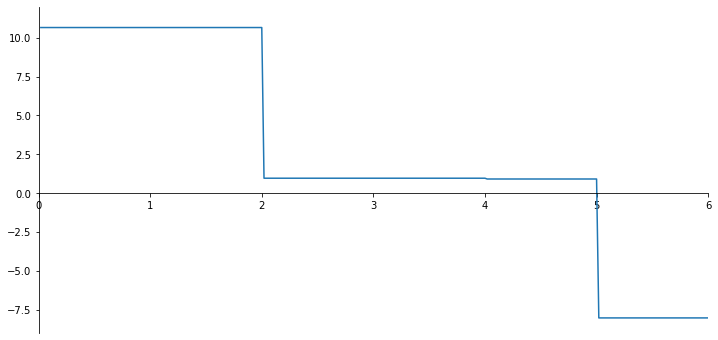

In [19]:
x_val = np.linspace(0, 3*l/2, 301)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) 
V_list = V_numpy(x_val)
print(V_list[200:202]) 

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-9, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(V_list)); 

[-0.24912772 -0.45129513]


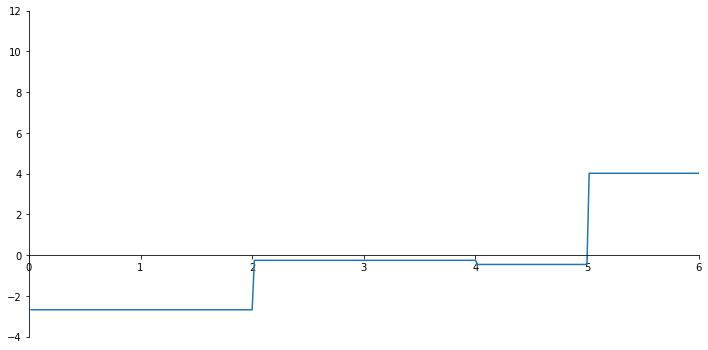

In [20]:
x_val = np.linspace(0, 3*l/2, 301)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) 
N_list = N_numpy(x_val)

print(N_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-4, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(N_list));

#### Iteratie 3

In [21]:
Cv, Cm, Cphi, Cw, Av, Bv, MA, Ah, Cn= sp.symbols('C_v, C_m, C_phi, C_w, A_v, B_v, M_A, A_h, C_n')

# Define qz and qx
DwaL =  0.95313212
DwaR =  0.90259026
NorL = -0.24912772
NorR = -0.45129513
qz1 = sp.nsimplify(-Av * sf(x, 0, -1) + MA* sf(x, 0, -2) + F1 *sf(x, l/2, -1) + DwaL * sf(x, l, -1) * sp.cos(theta)- NorL * sf(x, l, -1) * sp.sin(theta))
qz2 = sp.nsimplify(-Bv * sf(x, (3/2)*l, -1) + F2 *sf(x, (5/4)*l, -1) - DwaR *sf(x, l, -1)* sp.cos(alpha) + NorR * sf(x, l, -1)* sp.sin(alpha) )
qx1 = sp.nsimplify(Ah * sf(x, 0, -1) + DwaL * sf(x, l, -1) * sp.sin(theta)  + NorL * sf(x, l, -1)* sp.cos(theta))
qx2 = sp.nsimplify(-DwaR * sf(x, l, -1)*sp.sin(alpha) -NorR * sf(x, l, -1)* sp.cos(alpha))


# Define V as a function of x
## staaf 1
V1 = sp.cos(theta) * sp.integrate( -qz1 , x)
V2 = sp.integrate(- (sp.sin(theta) * sp.tan(theta) * qx1), x)
## staaf 2
V3 = sp.cos(alpha) * sp.integrate( -qz2 , x)
V4 = sp.integrate(- (sp.sin(alpha) * sp.tan(alpha) * qx2), x)

V =V1 + V2 + V3 + V4 + Cv

# Define M as an integral of V
## staaf 1
M1 = sp.integrate( (V1  / sp.cos(theta)), x)
M2 = sp.integrate( (V2  / sp.cos(theta)), x)
## sfaaf 2
M3 = sp.integrate((V3 / sp.cos(alpha)), x)
M4 = sp.integrate((V4 / sp.cos(alpha)), x)
M  = M1 + M2 + M3+ M4 + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw

N1 = sp.integrate(sp.sin(theta) * (-qx1 + qz1), x) + Cn
N2 = sp.integrate(sp.sin(alpha) * (-qx2 + qz2), x) 
N = N1+ N2 + Cn

In [22]:
eq1 = V.subs(x, -1)
eq2 = M.subs(x, -1)
eq3 = V.subs(x, (3/2)*l + 1)
eq4 = phi.subs(x, 0)
eq5 = W.subs(x, 0)
eq6 = M.subs(x, (3/2)*l)
eq7 = W.subs(x, (3/2)*l)
eq8 = N.subs(x, -0.01)
eq9 = N.subs(x, ((3/2)*l) +1 )
equations = [eq1-0, eq2-0, eq3-0, eq4-0, eq5-0, eq6-0, eq7 -0, eq8-0, eq9-0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, MA, Cn, Ah))
display(solutions)

{C_v: 0.0,
 C_m: 0.0,
 C_phi: 0.0,
 C_w: 0.0,
 A_v: 10.9840850145227,
 B_v: 8.99190939177049,
 M_A: 15.9502774939007,
 C_n: 0.0,
 A_h: 0.00962195189033341}

[0.95411928 0.90166365]


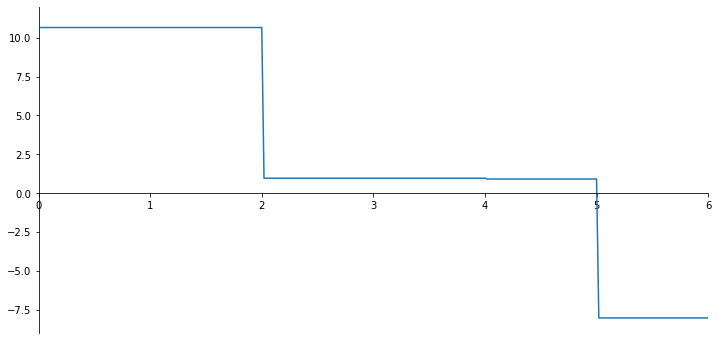

In [23]:
x_val = np.linspace(0, 3*l/2, 301)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) 
V_list = V_numpy(x_val)
print(V_list[200:202]) 

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-9, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(V_list));

[-0.24100934 -0.45083183]


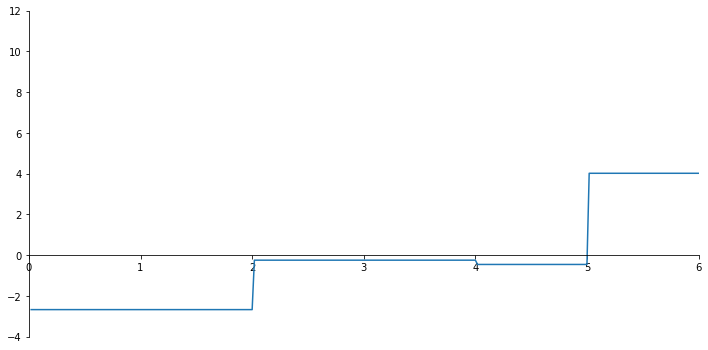

In [24]:
x_val = np.linspace(0, 3*l/2, 301)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) 
N_list = N_numpy(x_val)

print(N_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-4, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(N_list));

#### Iteratie 4

In [25]:
Cv, Cm, Cphi, Cw, Av, Bv, MA, Ah, Cn= sp.symbols('C_v, C_m, C_phi, C_w, A_v, B_v, M_A, A_h, C_n')

# Define qz and qx
DwaL =  0.95411928
DwaR =  0.90166365
NorL = -0.24100934
NorR = -0.45083183
qz1 = sp.nsimplify(-Av * sf(x, 0, -1) + MA* sf(x, 0, -2) + F1 *sf(x, l/2, -1) + DwaL * sf(x, l, -1) * sp.cos(theta)- NorL * sf(x, l, -1) * sp.sin(theta))
qz2 = sp.nsimplify(-Bv * sf(x, (3/2)*l, -1) + F2 *sf(x, (5/4)*l, -1) - DwaR *sf(x, l, -1)* sp.cos(alpha) + NorR * sf(x, l, -1)* sp.sin(alpha) )
qx1 = sp.nsimplify(Ah * sf(x, 0, -1) + DwaL * sf(x, l, -1) * sp.sin(theta)  + NorL * sf(x, l, -1)* sp.cos(theta))
qx2 = sp.nsimplify(-DwaR * sf(x, l, -1)*sp.sin(alpha) -NorR * sf(x, l, -1)* sp.cos(alpha))


# Define V as a function of x
## staaf 1
V1 = sp.cos(theta) * sp.integrate( -qz1 , x)
V2 = sp.integrate(- (sp.sin(theta) * sp.tan(theta) * qx1), x)
## staaf 2
V3 = sp.cos(alpha) * sp.integrate( -qz2 , x)
V4 = sp.integrate(- (sp.sin(alpha) * sp.tan(alpha) * qx2), x)

V =V1 + V2 + V3 + V4 + Cv

# Define M as an integral of V
## staaf 1
M1 = sp.integrate( (V1  / sp.cos(theta)), x)
M2 = sp.integrate( (V2  / sp.cos(theta)), x)
## sfaaf 2
M3 = sp.integrate((V3 / sp.cos(alpha)), x)
M4 = sp.integrate((V4 / sp.cos(alpha)), x)
M  = M1 + M2 + M3+ M4 + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw

N1 = sp.integrate(sp.sin(theta) * (-qx1 + qz1), x) + Cn
N2 = sp.integrate(sp.sin(alpha) * (-qx2 + qz2), x) 
N = N1 + N2 + Cn

In [26]:
eq1 = V.subs(x, -1)
eq2 = M.subs(x, -1)
eq3 = V.subs(x, (3/2)*l + 1)
eq4 = phi.subs(x, 0)
eq5 = W.subs(x, 0)
eq6 = M.subs(x, (3/2)*l)
eq7 = W.subs(x, (3/2)*l)
eq8 = N.subs(x, -0.01)
eq9 = N.subs(x, ((3/2)*l) +1 )
equations = [eq1-0, eq2-0, eq3-0, eq4-0, eq5-0, eq6-0, eq7 -0, eq8-0, eq9-0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, MA, Cn, Ah))
display(solutions)

{C_v: 0.0,
 C_m: 0.0,
 C_phi: 0.0,
 C_w: 0.0,
 A_v: 10.9838786097141,
 B_v: 8.99212083108564,
 M_A: 15.9507502786053,
 C_n: 0.0,
 A_h: 0.00222200751313955}

[0.95436773 0.90147453]


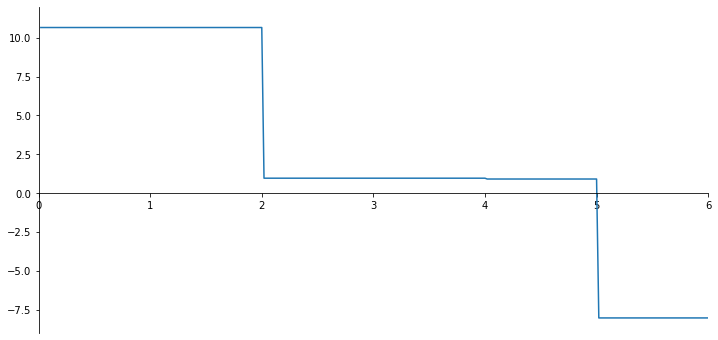

In [27]:
x_val = np.linspace(0, 3*l/2, 301)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) 
V_list = V_numpy(x_val)
print(V_list[200:202]) 

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-9, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(V_list)); 

[-0.23916453 -0.45073727]


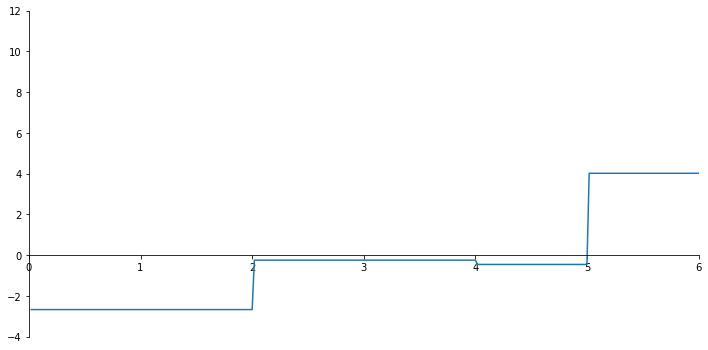

In [28]:
x_val = np.linspace(0, 3*l/2, 301)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) 
N_list = N_numpy(x_val)

print(N_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-4, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(N_list));

#### Iteratie 5

In [29]:
Cv, Cm, Cphi, Cw, Av, Bv, MA, Ah, Cn= sp.symbols('C_v, C_m, C_phi, C_w, A_v, B_v, M_A, A_h, C_n')

# Define qz and qx
DwaL =  0.95436773
DwaR =  0.90147453
NorL = -0.23916453
NorR = -0.45073727
qz1 = sp.nsimplify(-Av * sf(x, 0, -1) + MA* sf(x, 0, -2) + F1 *sf(x, l/2, -1) + DwaL * sf(x, l, -1) * sp.cos(theta)- NorL * sf(x, l, -1) * sp.sin(theta))
qz2 = sp.nsimplify(-Bv * sf(x, (3/2)*l, -1) + F2 *sf(x, (5/4)*l, -1) - DwaR *sf(x, l, -1)* sp.cos(alpha) + NorR * sf(x, l, -1)* sp.sin(alpha) )
qx1 = sp.nsimplify(Ah * sf(x, 0, -1) + DwaL * sf(x, l, -1) * sp.sin(theta)  + NorL * sf(x, l, -1)* sp.cos(theta))
qx2 = sp.nsimplify(-DwaR * sf(x, l, -1)*sp.sin(alpha) -NorR * sf(x, l, -1)* sp.cos(alpha))


# Define V as a function of x
## staaf 1
V1 = sp.cos(theta) * sp.integrate( -qz1 , x)
V2 = sp.integrate(- (sp.sin(theta) * sp.tan(theta) * qx1), x)
## staaf 2
V3 = sp.cos(alpha) * sp.integrate( -qz2 , x)
V4 = sp.integrate(- (sp.sin(alpha) * sp.tan(alpha) * qx2), x)

V =V1 + V2 + V3 + V4 + Cv

# Define M as an integral of V
## staaf 1
M1 = sp.integrate( (V1  / sp.cos(theta)), x)
M2 = sp.integrate( (V2  / sp.cos(theta)), x)
## sfaaf 2
M3 = sp.integrate((V3 / sp.cos(alpha)), x)
M4 = sp.integrate((V4 / sp.cos(alpha)), x)
M  = M1 + M2 + M3+ M4 + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw

N1 = sp.integrate(sp.sin(theta) * (-qx1 + qz1), x) + Cn
N2 = sp.integrate(sp.sin(alpha) * (-qx2 + qz2), x) 
N = N1 + N2 + Cn

In [30]:
eq1 = V.subs(x, -1)
eq2 = M.subs(x, -1)
eq3 = V.subs(x, (3/2)*l + 1)
eq4 = phi.subs(x, 0)
eq5 = W.subs(x, 0)
eq6 = M.subs(x, (3/2)*l)
eq7 = W.subs(x, (3/2)*l)
eq8 = N.subs(x, -0.01)
eq9 = N.subs(x, ((3/2)*l) +1 )
equations = [eq1-0, eq2-0, eq3-0, eq4-0, eq5-0, eq6-0, eq7 -0, eq8-0, eq9-0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, MA, Cn, Ah))
display(solutions)

{C_v: 0.0,
 C_m: 0.0,
 C_phi: 0.0,
 C_w: 0.0,
 A_v: 10.9838298415814,
 B_v: 8.99217079631337,
 M_A: 15.9508575377216,
 C_n: 0.0,
 A_h: 0.000512138382148610}

[0.95442409 0.90142984]


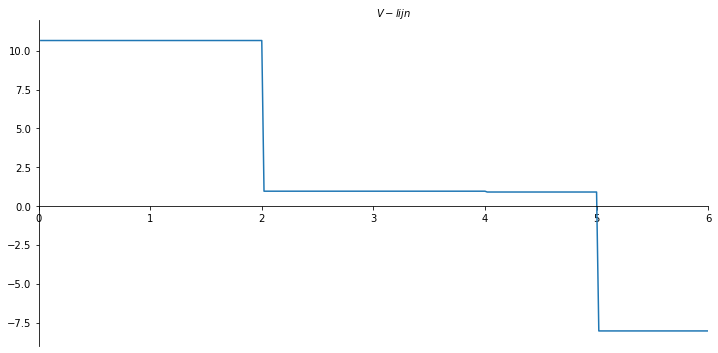

In [31]:
x_val = np.linspace(0, 3*l/2, 301)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) 
V_list = V_numpy(x_val)
print(V_list[200:202]) 

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-9, 12)
ax.set_xlabel("$V-lijn$")
ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(V_list))
plt.savefig('V_lijnvoorbeeld4', dpi=450);

[-0.238738   -0.45071492]


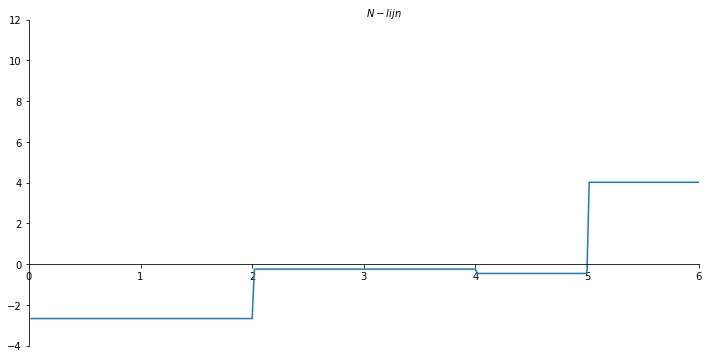

In [32]:
x_val = np.linspace(0, 3*l/2, 301)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) 
N_list = N_numpy(x_val)

print(N_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-4, 12)
ax.set_xlabel("$N-lijn$")
ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(N_list))
plt.savefig('N_lijnvoorbeeld4', dpi=450);

In [33]:
x_val1 = np.linspace(0, l, 301)
M_numpy1 = sp.lambdify(x,M.subs(solutions).rewrite(sp.Piecewise).simplify()) 
M_list1 = M_numpy1(x_val1)

x_val2 = np.linspace(l, 3*l/2, 301)
M_numpy2 = sp.lambdify(x,M.subs(solutions).rewrite(sp.Piecewise).simplify()) 
M_list2 = M_numpy2(x_val2)

''

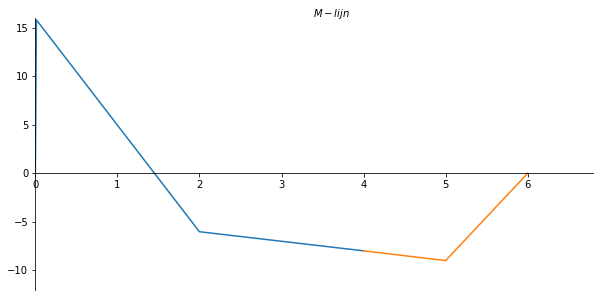

In [34]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6.8)
ax.set_ylim(-12, 16)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$M-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val1,  -np.array(M_list1) , label='M-lijn')
ax.plot(x_val2,  -np.array(M_list2) , label='M-lijn');
plt.savefig('M_lijnvoorbeeld4', dpi=450)
;

In [35]:
x_val = np.linspace(0, 3*l/2, 901)
phi_numpy = sp.lambdify(x,phi.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
phi_list = phi_numpy(x_val)

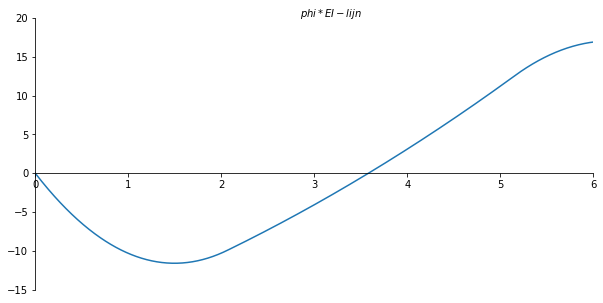

In [36]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-15, 20)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$phi*EI-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(phi_list) , label='phi-lijn')
plt.savefig('phi_lijnvoorbeeld4', dpi=450);

In [37]:
x_val = np.linspace(0, 3*l/2, 901)
W_numpy = sp.lambdify(x,W.subs(solutions).rewrite(sp.Piecewise).simplify())
W_list = W_numpy(x_val)

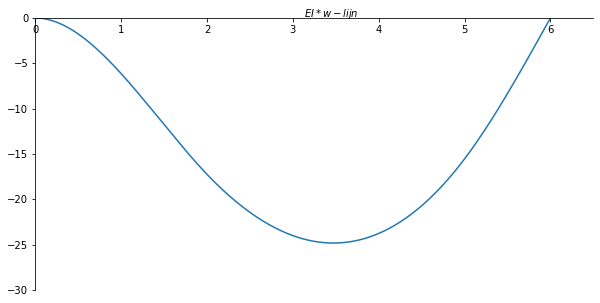

In [38]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6.5)
ax.set_ylim(-30, 0)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$EI * w-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, - np.array(W_list) , label='w-lijn')
plt.savefig('w_lijnvoorbeeld4', dpi=450);